<a href="https://colab.research.google.com/github/paridhika/DDL/blob/main/GENAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda:0


In [17]:
# pip install diffusers
!pip install torchinfo


In [ ]:
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16,
    variant="fp16",
).to(device)

In [19]:
# print(pipe)
# Print out the model part of the pipeline if it's accessible in a clear attribute
print(pipe.scheduler)  # This would print details about the scheduler used in the diffusion process



PNDMScheduler {
  "_class_name": "PNDMScheduler",
  "_diffusers_version": "0.27.2",
  "beta_end": 0.012,
  "beta_schedule": "scaled_linear",
  "beta_start": 0.00085,
  "clip_sample": false,
  "num_train_timesteps": 1000,
  "prediction_type": "epsilon",
  "set_alpha_to_one": false,
  "skip_prk_steps": true,
  "steps_offset": 1,
  "timestep_spacing": "leading",
  "trained_betas": null
}



  0%|          | 0/50 [00:00<?, ?it/s]

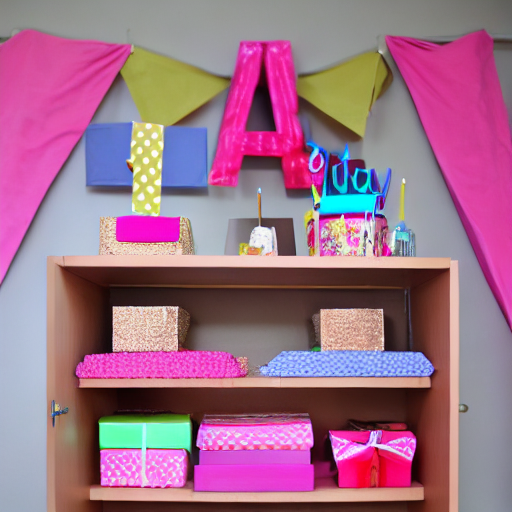

In [11]:
prompt = "a birthday wardrope for 4 year old birthday celebration decor"
pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

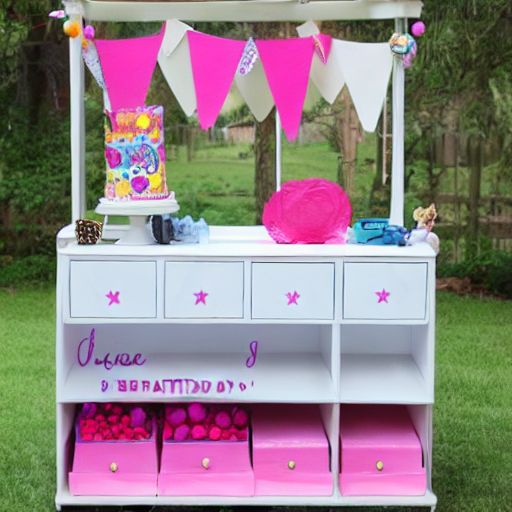

In [13]:
pipe(prompt).images[0]

In [20]:
from transformers import pipeline

classifier = pipeline("text-classification")
classifier("This movie is disgustingly good !")


generator = pipeline("text-generation")
prompt = "It was a dark and stormy"
generator(prompt)[0]["generated_text"]

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

No model was supplied, defaulted to openai-community/gpt2 and revision 6c0e608 (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'It was a dark and stormy day," he told reporters.\n\nPolice say an unidentified man was driving his pickup truck through a road, but was struck and killed by the vehicle.\n\nThe truck hit a small bridge that connects a street'

In [ ]:
audiopipe = pipeline("text-to-audio", model="facebook/musicgen-large", device=device)
data = audiopipe("electric rock solo, very intense")

config.json:   0%|          | 0.00/7.87k [00:00<?, ?B/s]

pytorch_model.bin.index.json:   0%|          | 0.00/98.1k [00:00<?, ?B/s]

pytorch_model-00001-of-00002.bin:   0%|          | 0.00/9.99G [00:00<?, ?B/s]

pytorch_model-00002-of-00002.bin:   0%|          | 0.00/3.73G [00:00<?, ?B/s]

In [22]:
# print(data)
import IPython.display as ipd

display(ipd.Audio(data["audio"][0], rate=data["sampling_rate"]))

NameError: name 'data' is not defined